# <img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFFY-15-M Cyber Security Analytics

# Portfolio Task 2:
## Conduct an investigation on a URL database to develop a DGA classification system using machine learning techniques 
---

**Student Name:** Rifat Tasnim Anannya<br>
<b>ID:</b> 21045383 <br>
<b>Module Leader:</b> Dr Phil Legg <br>
<b>Deadline:</b> 14:00 on 12th May 2022

---
#### Dataset

             A dga-24000.csv file has been given that contains the list of URLs and their corresponding 'family'.


#### Objective
1. Develop a machine learning tool using Python and scikit-learn that can identify URLs based on Domain Generator Algorithms (DGA) to avoid static IP blocking. 
2. Show how a suitable set of features can be derived from the data for developing a machine learning classifier using Python data science libraries. 
3. Compare the results of 3 different classifiers(Random Forest,Logistic Regression & MLP) using the scikit-learn library.
4. Provide a confusion matrix and an accuracy score for each classifier.
---

---
### Step 1: Importing libraries as required

At first, all the necessary libraries have been imported for this task.

---

In [51]:
# Import libraries as required
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000)
from matplotlib.colors import ListedColormap
from collections import Counter
from timeit import timeit
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import ensemble
import math
from collections import Counter
import tldextract
import sklearn

---
### Step 2: Load the dataset
Now, a given <b>dga</b> dataset has been loaded to <b>df</b>.

---

In [52]:
df = pd.read_csv('./dga-24000.csv')
df

,Domain,Family
0,google.com,benign
1,facebook.com,benign
2,youtube.com,benign
3,twitter.com,benign
4,instagram.com,benign
...,...,...
23995,fhyibfwhpahb.su,locky
23996,nlgusntqeqixnqyo.org,locky
23997,awwduqqrjxttmn.su,locky
23998,ccxmwif.pl,locky


---
### Step 3: Features Extraction
To fulfil the objectives, several features have been extracted which are suitable to the given dataset's column named "Domain".

---

---
#### Step 3a: Find out length of a Domain

To find out how many characters are there, the below command has been written in the <b>Domain</b> column.

Note:<b>head()</b> function has been used to limit the output.

---

In [53]:
df['Domain_length'] = df['Domain'].apply(len)
df.head()

,Domain,Family,Domain_length
0,google.com,benign,10
1,facebook.com,benign,12
2,youtube.com,benign,11
3,twitter.com,benign,11
4,instagram.com,benign,13


---
#### Step 3b: Splitting of SLD,TLD,SD
Splitting of second level domain(sld), top level domain(tld) & subdomain have been implemented below over <b>Domain</b> column using tldextract.

---

In [54]:
df['sld'] = [tldextract.extract(i).domain for i in df['Domain']]
df['tld'] = [tldextract.extract(i).suffix for i in df['Domain']]
df['subdomain']=[tldextract.extract(i).subdomain for i in df['Domain']]
df

,Domain,Family,Domain_length,sld,tld,subdomain
0,google.com,benign,10,google,com,
1,facebook.com,benign,12,facebook,com,
2,youtube.com,benign,11,youtube,com,
3,twitter.com,benign,11,twitter,com,
4,instagram.com,benign,13,instagram,com,
...,...,...,...,...,...,...
23995,fhyibfwhpahb.su,locky,15,fhyibfwhpahb,su,
23996,nlgusntqeqixnqyo.org,locky,20,nlgusntqeqixnqyo,org,
23997,awwduqqrjxttmn.su,locky,17,awwduqqrjxttmn,su,
23998,ccxmwif.pl,locky,10,ccxmwif,pl,


---
#### Step 3c: Length of SLD,TLD,SD

Again len() has been applied for these columns(SLD,TLD,SD) to find out their lengths. 

---

In [55]:
df['sld_len'] = df['sld'].apply(len)
df['tld_len'] = df['tld'].apply(len)
df['sub_len'] = df['subdomain'].apply(len)
df.head()

,Domain,Family,Domain_length,sld,tld,subdomain,sld_len,tld_len,sub_len
0,google.com,benign,10,google,com,,6,3,0
1,facebook.com,benign,12,facebook,com,,8,3,0
2,youtube.com,benign,11,youtube,com,,7,3,0
3,twitter.com,benign,11,twitter,com,,7,3,0
4,instagram.com,benign,13,instagram,com,,9,3,0


----
Based on above features an example has been given below which locates <b>12th</b> no row where expected output has been displayed.

---

In [56]:
print(df.loc[12])

Domain           en.wikipedia.org
Family                     benign
Domain_length                  16
sld                     wikipedia
tld                           org
subdomain                      en
sld_len                         9
tld_len                         3
sub_len                         2
Name: 12, dtype: object


----
#### Step 3d: Find out Entropy

Contextually it refers to the disorganized patterns of characters in domain name. Precisely, it refers to the degree of uncertainity. 
Note: Higher entropy means higher uncertainity. For example, a domain name like xyfxyyxyxyfxy.com has a high entropy because of the chaotic patterns.

Note: Here, shannon's entropy has been used (Lisowski, 2021).


---

In [57]:
def entropy(s):
 p, lns = Counter(s), float(len(s))
 return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

In [58]:
df['entropy']=[entropy(x) for x in df['Domain']]
df.head()

,Domain,Family,Domain_length,sld,tld,subdomain,sld_len,tld_len,sub_len,entropy
0,google.com,benign,10,google,com,,6,3,0,2.646439
1,facebook.com,benign,12,facebook,com,,8,3,0,3.022055
2,youtube.com,benign,11,youtube,com,,7,3,0,3.095795
3,twitter.com,benign,11,twitter,com,,7,3,0,3.027169
4,instagram.com,benign,13,instagram,com,,9,3,0,3.392747


----
#### Step 3e: Find out ratio of vowel & consonant

From <b>Domain</b> column vowel & consonant count have  been done which later divided by the Length of Domain to find out the ratio.  



---

In [59]:
def countvowels(colname):
    num_vowels=0
    for char in colname:
        if char in "aeiouAEIOU":
           num_vowels= num_vowels+1
    return num_vowels

In [60]:
df['vowel_count']=df['Domain'].apply(countvowels)
df['vowel_ratio']=df['vowel_count']/df['Domain_length']
df.head()

,Domain,Family,Domain_length,sld,tld,subdomain,sld_len,tld_len,sub_len,entropy,vowel_count,vowel_ratio
0,google.com,benign,10,google,com,,6,3,0,2.646439,4,0.400000
1,facebook.com,benign,12,facebook,com,,8,3,0,3.022055,5,0.416667
2,youtube.com,benign,11,youtube,com,,7,3,0,3.095795,5,0.454545
3,twitter.com,benign,11,twitter,com,,7,3,0,3.027169,3,0.272727
4,instagram.com,benign,13,instagram,com,,9,3,0,3.392747,4,0.307692


In [61]:
def countcons(colname):
    num_cons=0
    for char in colname:
        if char not in "aeiouAEIOU":
           num_cons= (num_cons+1)
    return num_cons

In [62]:
df['cons_count']=df['Domain'].apply(countcons)
df['cons_ratio']=df['cons_count']/df['Domain_length']
df.head()

,Domain,Family,Domain_length,sld,tld,subdomain,sld_len,tld_len,sub_len,entropy,vowel_count,vowel_ratio,cons_count,cons_ratio
0,google.com,benign,10,google,com,,6,3,0,2.646439,4,0.400000,6,0.600000
1,facebook.com,benign,12,facebook,com,,8,3,0,3.022055,5,0.416667,7,0.583333
2,youtube.com,benign,11,youtube,com,,7,3,0,3.095795,5,0.454545,6,0.545455
3,twitter.com,benign,11,twitter,com,,7,3,0,3.027169,3,0.272727,8,0.727273
4,instagram.com,benign,13,instagram,com,,9,3,0,3.392747,4,0.307692,9,0.692308


#### Step 3f: Presence of Digits

To find out any digits from the <b>Domain</b> column,counting the digit has been done first. Later on, division by domain length has been calculated to find out the ratio.

In [63]:
df['count_num']=df['Domain'].str.count('\d')
df['num_ratio']=df['count_num']/df['Domain_length']
df.head()

,Domain,Family,Domain_length,sld,tld,subdomain,sld_len,tld_len,sub_len,entropy,vowel_count,vowel_ratio,cons_count,cons_ratio,count_num,num_ratio
0,google.com,benign,10,google,com,,6,3,0,2.646439,4,0.400000,6,0.600000,0,0.0
1,facebook.com,benign,12,facebook,com,,8,3,0,3.022055,5,0.416667,7,0.583333,0,0.0
2,youtube.com,benign,11,youtube,com,,7,3,0,3.095795,5,0.454545,6,0.545455,0,0.0
3,twitter.com,benign,11,twitter,com,,7,3,0,3.027169,3,0.272727,8,0.727273,0,0.0
4,instagram.com,benign,13,instagram,com,,9,3,0,3.392747,4,0.307692,9,0.692308,0,0.0


---
Scikit learn contains NGram generator that can generate either char NGrams or word NGrams. Char has been used for this case. All ngrams of length 3,4,5 has been set as range.

---

In [64]:
#(SKLearn, 2018) and (Sconzo, 2022)
words = pd.read_fwf('./words.txt', names=['word'], header=None, dtype={'word': str}, encoding='utf-8')
words = words[words['word'].map(lambda x: str(x).isalpha())]
words = words.applymap(lambda x: str(x).strip().lower())
words = words.dropna()
words = words.drop_duplicates()
words.head()


,word
37,a
48,aa
51,aaa
53,aaaa
54,aaaaaa


---
Additionally, a bunch of dictionary words have been thrown & has been computed below. 
Transform method of the CountVectorizer has been used to form a vector.

---

In [65]:
#(SKLearn, 2018) and (Sconzo, 2022)
word_vc = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-5, max_df=1.0)
counts_matrix = word_vc.fit_transform(words['word'])
word_counts = np.log10(counts_matrix.sum(axis=0).getA1())
ngrams_list = word_vc.get_feature_names()

def ngram_count(domain):
    word_match = word_counts * word_vc.transform([domain]).T

---
### Step 4: New dataframe containing suitable features

In this stage, a new dataframe <b>Set_of_fet</b> containning all the necessary features has been created by dropping others. 

---

In [66]:
Set_of_fet=df
Set_of_fet['Word Gram_URL']= word_counts * word_vc.transform(df['Domain']).T
Set_of_fet['Word Gram_Sub Domain']= word_counts * word_vc.transform(df['subdomain']).T
Set_of_fet['Word Gram_sld']= word_counts * word_vc.transform(df['sld']).T
Set_of_fet['Word Gram_tld']= word_counts * word_vc.transform(df['tld']).T
sof_to_drop=['Domain','Family','sld','tld','subdomain']
Set_of_fet=Set_of_fet.drop(sof_to_drop, axis=1)
Set_of_fet.head()

,Domain_length,sld_len,tld_len,sub_len,entropy,vowel_count,vowel_ratio,cons_count,cons_ratio,count_num,num_ratio,Word Gram_URL,Word Gram_Sub Domain,Word Gram_sld,Word Gram_tld
0,10,6,3,0,2.646439,4,0.400000,6,0.600000,0,0.0,17.842765,0.0,14.517455,3.32531
1,12,8,3,0,3.022055,5,0.416667,7,0.583333,0,0.0,30.678833,0.0,27.353523,3.32531
2,11,7,3,0,3.095795,5,0.454545,6,0.545455,0,0.0,20.961455,0.0,17.636145,3.32531
3,11,7,3,0,3.027169,3,0.272727,8,0.727273,0,0.0,33.835552,0.0,30.510242,3.32531
4,13,9,3,0,3.392747,4,0.307692,9,0.692308,0,0.0,44.730658,0.0,41.405348,3.32531


---
#### Check heatmap for null

Just to make sure is there any missing values or not. 
Observation: there is no missing values.

---

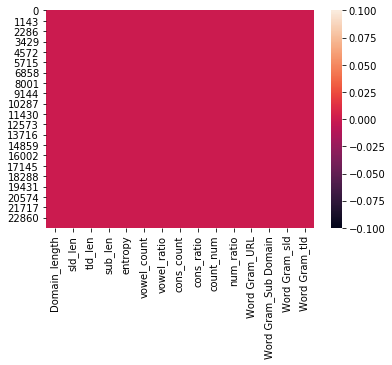

In [67]:
sb.heatmap(Set_of_fet.isnull())

#### Cleanup any blank lines & display info.

In [68]:
Set_of_fet=Set_of_fet.dropna()
Set_of_fet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 0 to 23999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domain_length         24000 non-null  int64  
 1   sld_len               24000 non-null  int64  
 2   tld_len               24000 non-null  int64  
 3   sub_len               24000 non-null  int64  
 4   entropy               24000 non-null  float64
 5   vowel_count           24000 non-null  int64  
 6   vowel_ratio           24000 non-null  float64
 7   cons_count            24000 non-null  int64  
 8   cons_ratio            24000 non-null  float64
 9   count_num             24000 non-null  int64  
 10  num_ratio             24000 non-null  float64
 11  Word Gram_URL         24000 non-null  float64
 12  Word Gram_Sub Domain  24000 non-null  float64
 13  Word Gram_sld         24000 non-null  float64
 14  Word Gram_tld         24000 non-null  float64
dtypes: float64(8), int6

---
### Step 5: Split & Train data

Data splitting has been done. test_size=0.2 indicates that, 20% data have been tested & rests are traning data. 

---

In [69]:
X=Set_of_fet
y=df['Family']
y=LabelEncoder().fit_transform(y.astype('str'))
y
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

---
From shape function's output, it has been observed that 4800 rows have been resided in the test data & 19200 rows have been resided in the train data. 

---

In [70]:
X_train.shape

(19200, 15)

In [71]:
X_test.shape

(4800, 15)

---
### Step 6: Using Classifiers

According to the instructions provided for this task, Random Forest, Logistic Regression & MLP Classifiers have been applied.

---

---
#### Step 6a: Random Forest Classification

Its a supervised learning algorithm. Precisely, Its an ensemble method of decision trees generated on a randomly split dataset where collection of decision tree known as Forest (Yiu,2019).

Here, RandomForestClassifier <b>rf_clf= RandomForestClassifier(max_depth=100, random_state=42)</b> [given] has been used which gives the accuracy score[86%] also confusion_matrix has been displayed.

---

In [72]:
from sklearn import ensemble
rf_clf=ensemble.RandomForestClassifier(max_depth=100, random_state=42)
rf_clf.fit(X_train,y_train)
rf_clf.score(X_test,y_test)

0.863125

In [73]:
# Predict the value of the digit on the test subset
predicted = rf_clf.predict(X_test)
print(f"Classification report for classifier {rf_clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n")


Classification report for classifier RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       175
           1       0.86      0.86      0.86       190
           2       0.93      0.98      0.96       193
           3       0.81      0.90      0.85       208
           4       1.00      1.00      1.00       211
           5       0.60      0.45      0.51       214
           6       0.69      0.70      

---
#### Analysis
For the Random Forest classifier, the accuracy score has been 86% which means this model has been 86% accurate in making a correct prediction. 4 maximum precision have been identified as well as 80% above have been found for rest of the families. Precisely, it has been reflected that how reliable the model is in classifying samples as positive. 
For recall it has given 100% for 5 families and more than 80% for most of the other families. It seems good as the higher the recall, the more positive samples detected.By taking both precision & recall into account, 5 families have 100% F1 score.
Specially for benign family it has provided 86% for precision, recall and F1-score.

---

---
#### Confusion Matrix

---

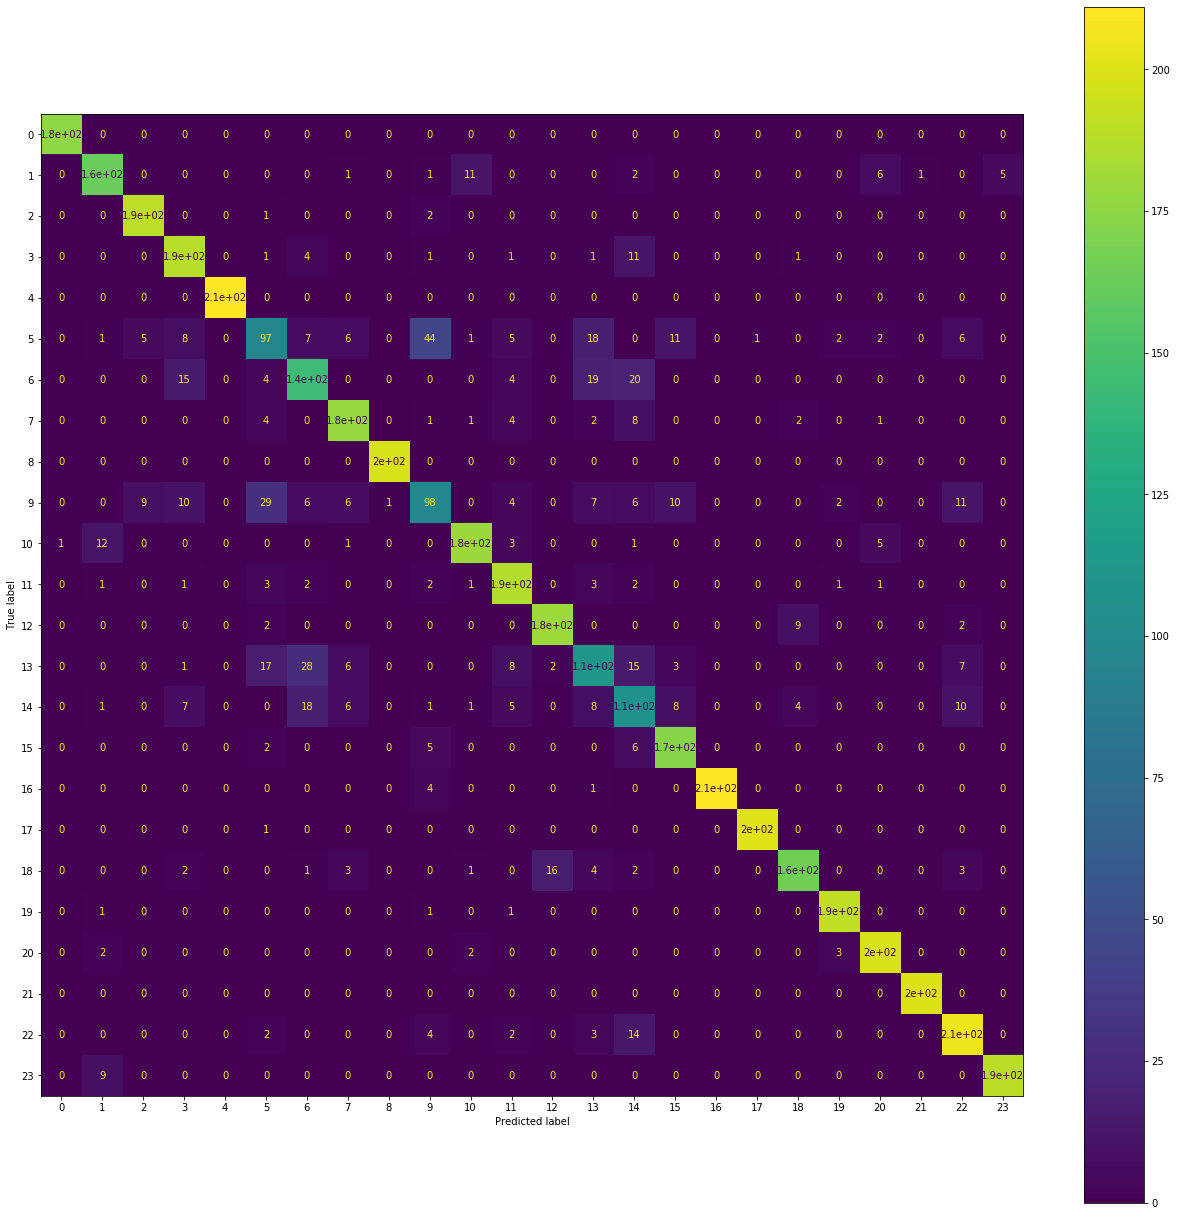

In [74]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(22, 22))
plot_confusion_matrix(rf_clf , X_test, y_test, cmap=plt.cm.viridis, ax=ax)
plt.show()

---
From the above <b>Confusion Matrix</b>, accuracy for Random Forest Classsfier based on the extracted feature is visualized with the variation of gradiant.

---


In [75]:
#conf_mat=confusion_matrix(y_test,predicted)
#print(conf_mat)
#sb.heatmap(conf_mat)
#plt.show()

---
#### Step 6b: Logistic Regression

It's a supervised ML algorithm. It takes the value of a dependent variable to make predictions (Maran, 2019).
Now,LogisticRegressionClassifier <b>lr_clf = LogisticRegression(random_state=42)</b> [given] has been used which gives the accuracy score 58%. Additionally, Confusion Matrix has been displayed. 

---

In [76]:
lr_clf= LogisticRegression(random_state=42)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

/home/uwe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.58125

In [77]:
# Predict the value of the digit on the test subset
predicted_lr = lr_clf.predict(X_test)
print(f"Classification report for classifier {lr_clf}:\n"
    f"{metrics.classification_report(y_test, predicted_lr)}\n"
)

Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False):
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       175
           1       0.68      0.54      0.60       190
           2       0.50      0.78      0.61       193
           3       0.00      0.00      0.00       208
           4       1.00      1.00      1.00       211
           5       0.02      0.01      0.02       214
           6       0.43      0.42      0.42       207
           7       0.32      0.29      0.30       201
           8       0.68      0.97      0.80       198
           9       0.26      0.36      0.30       199
          10       0.81      0.71      0.76

---
#### Analysis
For the Logistic regression, the accuracy score has been 59% which means this model has been 59% accurate in making a correct prediction. Two maximum precision have been identified as well as Two 0% have been there for flubot & tinba family. Precisely, it has been reflected that how reliable the model is in classifying samples as positive. 
For recall similar results have been identified as precision. By taking both precision & recall into account, only gameover has 100% F1 score.
Specially for benign family it has provided 68,54,60 percents for precision, recall and F1-score respectively.

---

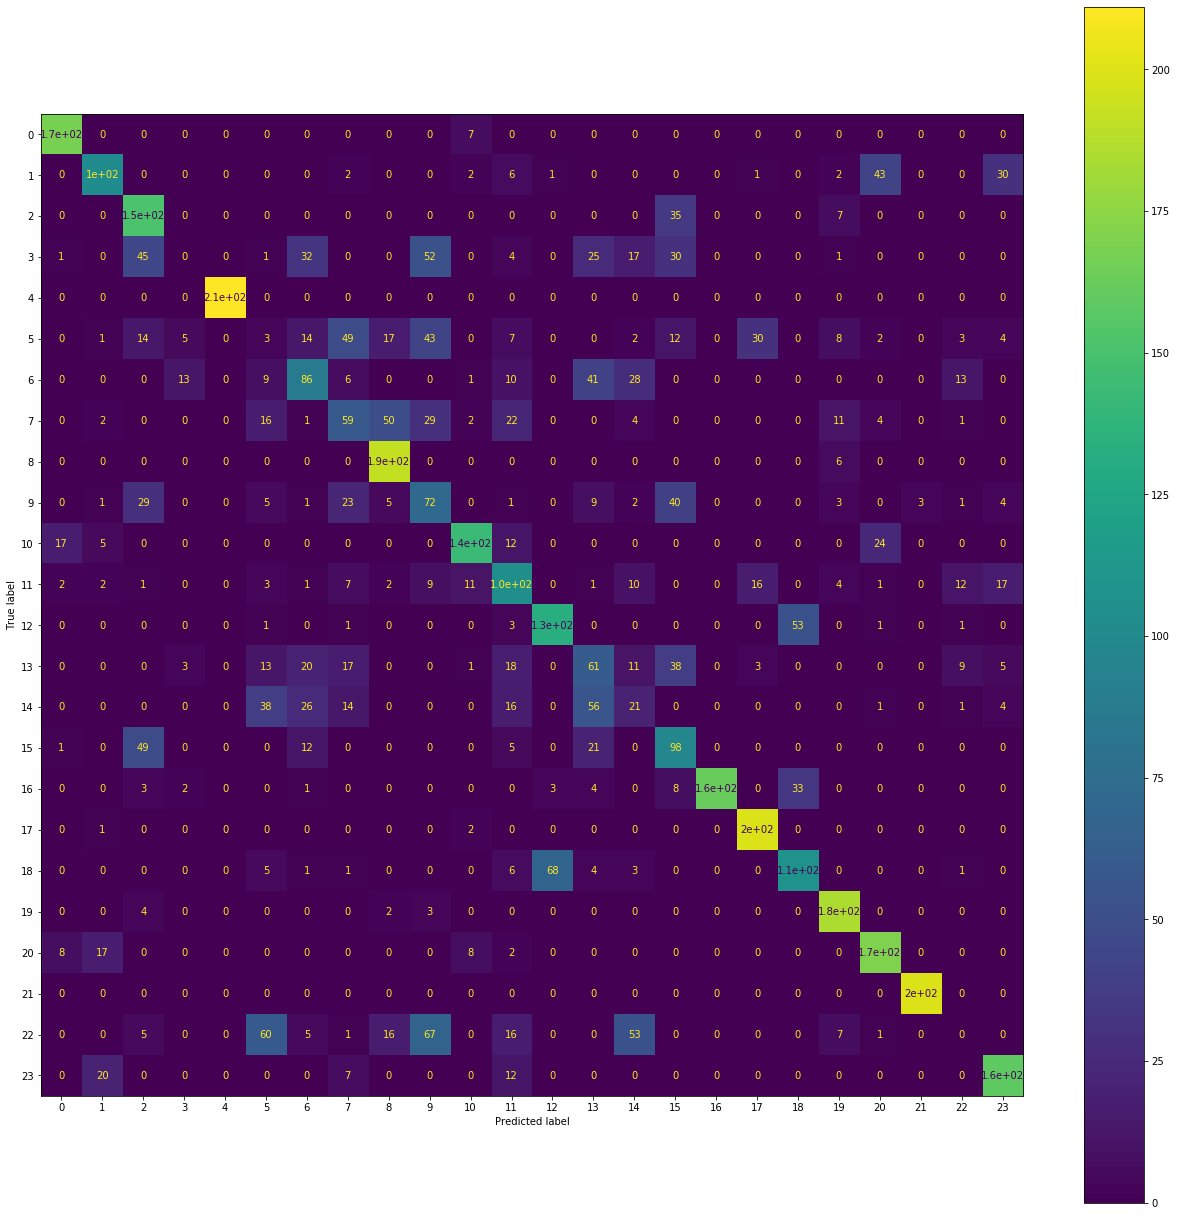

In [78]:
fig, ax = plt.subplots(figsize=(22, 22))
plot_confusion_matrix(lr_clf , X_test, y_test, cmap=plt.cm.viridis, ax=ax)
plt.show()

---
From the above <b>Confusion Matrix</b>, accuracy for Logistic Regression Classsfier based on the extracted feature is visualized with the variation of gradiant.

---

In [79]:
#conf_mat=confusion_matrix(y_test,predicted_lr)
#print(conf_mat)
#sb.heatmap(conf_mat)
#plt.show()

---
#### Step 6c: Multi-Layer Perceptron Classifier

MLP depends on an underlying neural network to perform the classification. It consists of at least 3 layers of nodes including input, hidden & output.It uses a learning mechanism named <b>blackpropagation for training</b> for training (scikit-learns, 2019).

Now, MLP <b>clf= MLPClassifier(random_state=42,max_iter=300)</b> [given] has been applied which has given 85% as the accuracy score. Additionally, Confusion Matrix has been displayed. 

---

In [80]:
mlp_clf= MLPClassifier(random_state=42,max_iter=300)
mlp_clf.fit(X_train,y_train)
mlp_clf.score(X_test,y_test)


0.846875

In [81]:
predicted_mlp = mlp_clf.predict(X_test)
print(
    f"Classification report for classifier {mlp_clf}:\n"
    f"{metrics.classification_report(y_test, predicted_mlp)}\n"
)

Classification report for classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       175
           1       0.93      0.67      0.78       190
           2       0.94      0.97      0.96       193
           3       0.83      0.85      0.84       208
           4       1.00      1.00      1.00       211
           5       0.69      0.33      0.44       214
           6       0.63      0.75      0.69       207
     

In [82]:
# Predict the value of the digit on the test subset
predicted_mlp = mlp_clf.predict(X_test)
print(f"Classification report for classifier {mlp_clf}:\n"
    f"{metrics.classification_report(y_test, predicted_mlp)}\n"
)

Classification report for classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       175
           1       0.93      0.67      0.78       190
           2       0.94      0.97      0.96       193
           3       0.83      0.85      0.84       208
           4       1.00      1.00      1.00       211
           5       0.69      0.33      0.44       214
           6       0.63      0.75      0.69       207
     

---
For the MLP, the accuracy score has been 85% which means this model has been 84% accurate in making a correct prediction. Three maximum precision have been identified as well as more than 60% have been indicated for the rest of other families. Precisely, it has been reflected that how reliable the model is in classifying samples as positive. 
For recall five 100% results have been identified. By taking both precision & recall into account, three families have 100% F1 score.
Specially for benign family it has provided 93,67,78 percents for precision, recall and F1-score respectively.

---

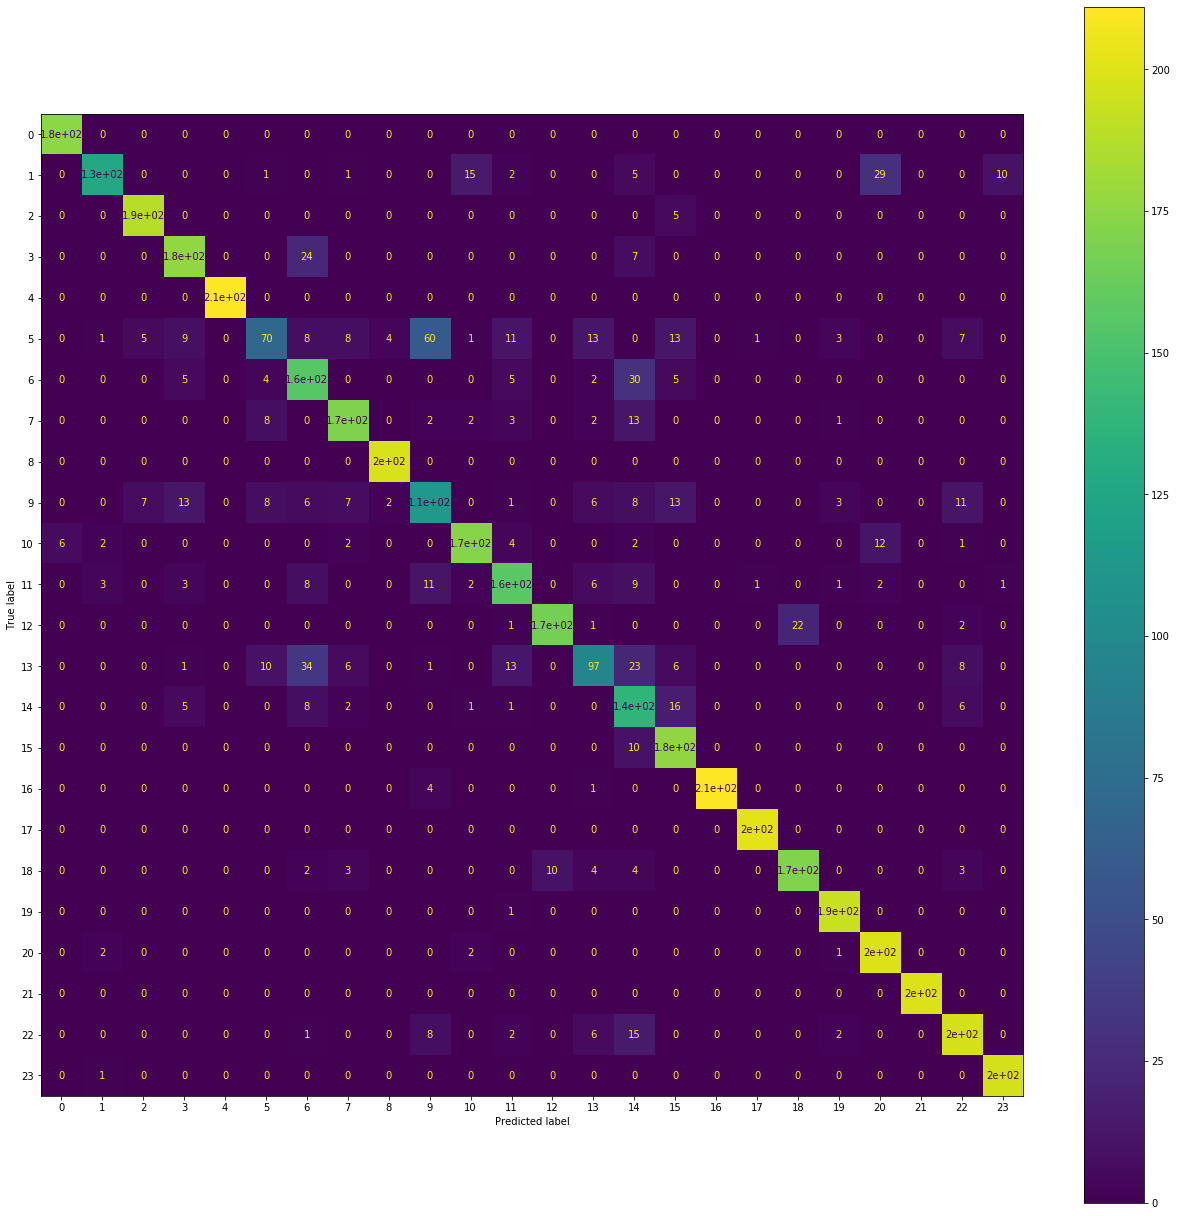

In [83]:
fig, ax = plt.subplots(figsize=(22, 22))
plot_confusion_matrix(mlp_clf , X_test, y_test, cmap=plt.cm.viridis, ax=ax)
plt.show()

---
From the above <b>Confusion Matrix</b>, accuracy for Multi Layer Percertron Classsfier based on the extracted feature is visualized with the variation of gradiant.

---

In [84]:
#conf_mat=confusion_matrix(y_test,predicted_mlp)
#print(conf_mat)
#sb.heatmap(conf_mat)
#plt.show()

---
### Step 7: Comparison between classifiers

Partially taken from-
Code source: Gaël Varoquaux
              Andreas Müller
Modified for documentation by Jaques Grobler
License: BSD 3 claus

---

/home/uwe/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/uwe/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


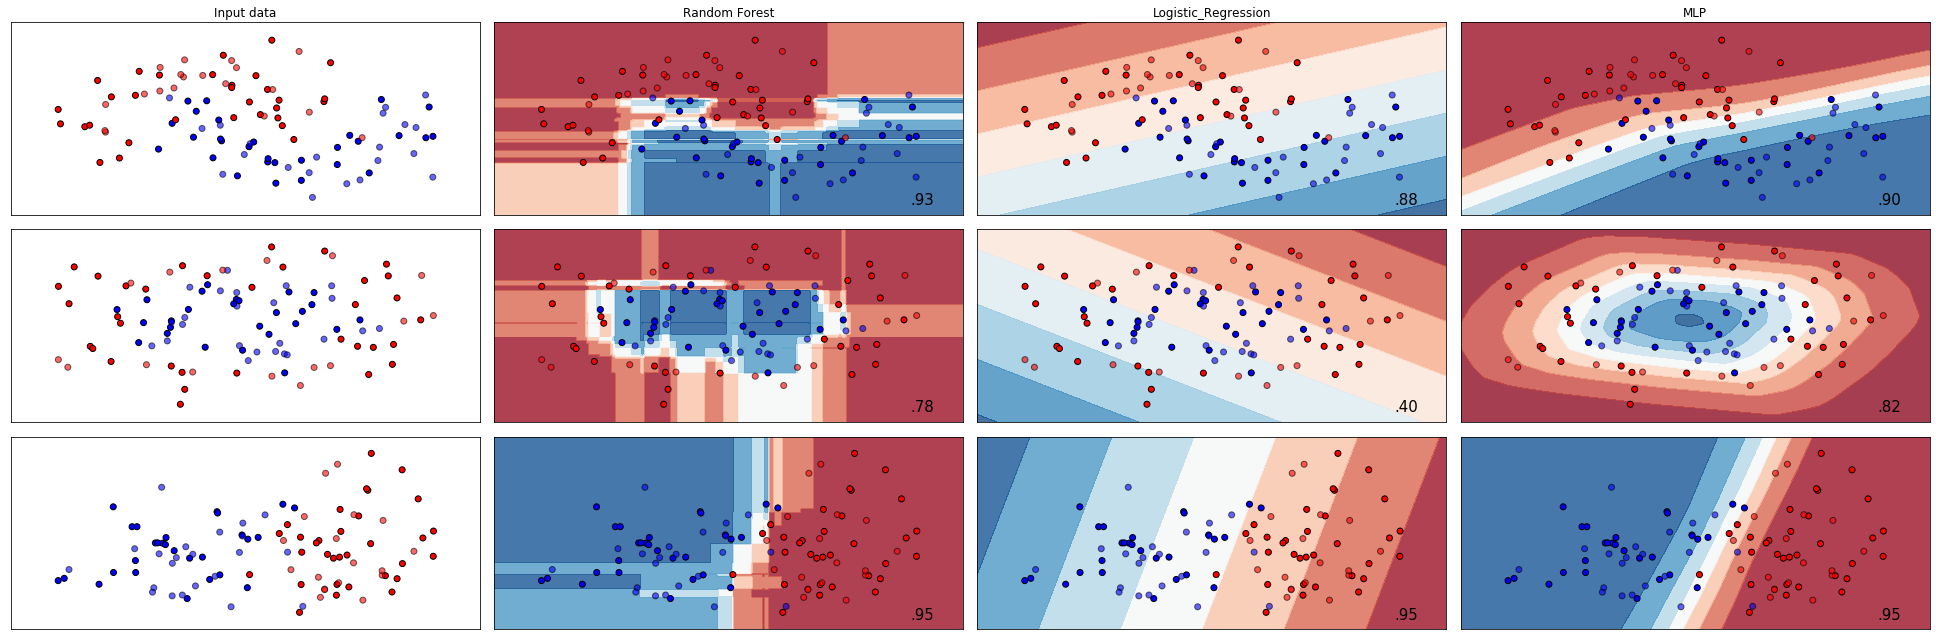

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
h = 0.02  # step size in the mesh

names = [
    "Random Forest",
    "Logistic_Regression",
    "MLP",

]

classifiers = [
    
    RandomForestClassifier(max_depth=100, n_estimators=10, max_features=1),
    LogisticRegression(random_state=42),
    MLPClassifier(alpha=1, max_iter=300),
    
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

---
### References

‘A beginner’s guide to Scikit-learn’s MLPClassifier’ (2019) Analytics India Magazine.20 June 2019 [online]. Available from: https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/?fbclid=IwAR0Cbti16Vg-szAs3a1MijG8RvqJ763GUu3zrs7Gglp-QTcQYAmmWhOjbWw [Accessed 25 April 2022].

Lisowski, E. (2021) What is entropy in machine learning? Addepto.23 August 2021 [online]. Available from: https://addepto.com/what-is-entropy-in-machine-learning/?utm_source=rss&utm_medium=rss&utm_campaign=what-is-entropy-in-machine-learning [Accessed 25 April 2022].

Maran Chandrasekaran, M.Q.A.S. (2019) Logistic regression for machine learning Capital One. [online]. Available from: https://www.capitalone.com/tech/machine-learning/what-is-logistic-regression/?fbclid=IwAR0tRPfCIymeBAAevj0Vq_prGVBc0vkukHTZgsQEtPJX5CHJVTAuyktEAiU [Accessed 25 April 2022].

Sconzo, M. (2022) data_hacking GitHub.5 May 2022 [online]. Available from: https://github.com/SuperCowPowers/data_hacking/blob/master/dga_detection/DGA_Domain_Detection.ipynb [Accessed 28 March 2022] [Accessed 25 April 2022].

SKLearn (2018) sklearn.feature_extraction.text.CountVectorizer — scikit-learn 0.20.3 documentation Scikit-learn.org.2018 [online]. Available from: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html [Accessed 25 April 2022].

Yiu, T. (2019) Understanding random forest Towards Data Science.12 June 2019 [online]. Available from: https://towardsdatascience.com/understanding-random-forest-58381e0602d2?fbclid=IwAR2bQXZYoQtFfYtGaBTk2Z3oCppxRGuu_rz3uvfJA7IJNBzOOxXKhYGhWVA [Accessed 25 April 2022].


---
### Self-Assessment

-**1. Suitable data pre-processing stages (25%):-** 20%.

-**2. Suitable usage of machine learning library (25%):-** 25%.

-**3. Suitable assessment of the machine learning results (25%):-** 22%.

-**4. Clarity and professional report presentation (25%):-** 25% .


    A suitable set of features have been extracted for developing a machine learning classifier that can identify DGA URLs. Among three classifiers, results showed that Random Forest classifier gives the highest accuracy score of 86% for the given dataset by the extracted features.

---